In [1]:
import os
os.chdir(os.path.join(os.getcwd(), '..'))
os.getcwd()

'/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA'

In [18]:
from src.utils import get_dataset
from src.utils import select_data

import av
import glob
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def get_action_number(single_path):
    return int(single_path.split('/')[-1].split('_')[0][1:])
def get_subject_number(single_path):
    return int(single_path.split('/')[-1].split('_')[1][1:])
def get_trial_number(single_path):
    return int(single_path.split('/')[-1].split('_')[2][1:])

In [3]:
DATA_PATH = os.path.join(os.getcwd(), 'data')
os.listdir(DATA_PATH)

['Depth', 'Inertial', 'Skeleton', 'RGB']

In [5]:
depth_path, inertial_path, skeleton_path, rgb_path = get_dataset(DATA_PATH)

In [6]:
activities = list(range(1,28))

In [50]:
vid = av.open(rgb_path[450])
frame = next(vid.demux()).decode()

AVError: [Errno 2] No such file or directory: '/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA/data/RGB/a15_s1_t4_color.avi'

In [176]:
np.asarray(frame[0].to_image()).shape

TypeError: 'av.video.frame.VideoFrame' object is not subscriptable

In [7]:
all_lengths = []
for i in range(len(rgb_path)):
    vid = av.open(rgb_path[i])
    images = []
    for packet in vid.demux():
        for frame in packet.decode():
            img = frame.to_image()  # PIL/Pillow image
            arr = np.asarray(img, dtype = np.uint8)  # numpy array
            images.append(arr)
    images = np.array(images)
    all_lengths.append(images.shape[0])
#     print("i: {}, shape: {}".format(i, images.shape))

deprecated pixel format used, make sure you did set range correctly


KeyboardInterrupt: 

96 32 52.24390243902439


(array([ 41., 179., 231., 174., 132.,  54.,  31.,  10.,   3.,   6.]),
 array([32. , 38.4, 44.8, 51.2, 57.6, 64. , 70.4, 76.8, 83.2, 89.6, 96. ]),
 <a list of 10 Patch objects>)

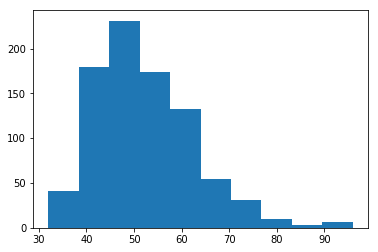

In [16]:
all_lengthsgths = np.array(all_lengths)
print(all_lengths.max(), all_lengths.min(), all_lengths.mean())
plt.hist(all_lengths)

In [13]:
vid = av.open(rgb_path[450])
vid

<av.InputContainer '/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA/data/RGB/a15_s1_t4_color.avi'>

In [14]:
vid.duration

3200000

# Chopping the Videos into Images

In [64]:
def rename_image(video_path, img_slice):
    '''
    video_path: rgb_path
    img_slice: int
    '''
    img_slice = str(img_slice).zfill(2)
    
    return video_path.split('/')[-1].split('.')[0] +'_' + img_slice + '.png'

In [189]:
# train_or_val = 'train'
train_or_val = 'val'

resample_len = 32


In [190]:
for i in range(len(activities)):
    class_num = str(i)
    action_num = str(int(class_num) + 1)
    video_paths = glob.glob(os.path.join(DATA_PATH, 'RGB', train_or_val, 'a' + action_num+'_*avi'))
    print('class_num: {}, tot_num_of_actions: {}'.format(class_num, len(video_paths)))
    save_path = os.path.join(DATA_PATH, 'RGB_images',train_or_val, class_num)
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    print(save_path)
    for video_path in video_paths:
#     video_path = video_paths[0]
        vid = av.open(video_path)
        images = []
        for packet in vid.demux():
            for frame in packet.decode():
                img = frame.to_image()  # PIL/Pillow image
        #         print(img)
                images.append(img)
        # images = np.array(images)
        start = int((len(images) - resample_len) /2)
        end = int((len(images) - resample_len) /2 + resample_len)
        save_images = images[start:end]
        for img_slice in range(len(save_images)):
#             print("image saved: {}".format(rename_image(video_path, img_slice)))
            img = save_images[img_slice]
            img.save(os.path.join(save_path, rename_image(video_path, img_slice)))

class_num: 0, tot_num_of_actions: 16
/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA/data/RGB_images/val/0
class_num: 1, tot_num_of_actions: 16
/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA/data/RGB_images/val/1
class_num: 2, tot_num_of_actions: 16
/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA/data/RGB_images/val/2
class_num: 3, tot_num_of_actions: 16
/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA/data/RGB_images/val/3
class_num: 4, tot_num_of_actions: 16
/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA/data/RGB_images/val/4
class_num: 5, tot_num_of_actions: 16
/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA/data/RGB_images/val/5
class_num: 6, tot_num_of_actions: 16
/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA/data/RGB_images/val/6
class_num: 7,

In [175]:
for video_path in video_paths:
#     video_path = video_paths[0]
    vid = av.open(video_path)
    images = []
    for packet in vid.demux():
        for frame in packet.decode():
            img = frame.to_image()  # PIL/Pillow image
    #         print(img)
            images.append(img)
    # images = np.array(images)
    start = int((len(images) - resample_len) /2)
    end = int((len(images) - resample_len) /2 + resample_len)
    save_images = images[start:end]
    for img_slice in range(len(save_images)):
        print("image saved: {}".format(rename_image(video_path, img_slice)))
        img = save_images[img_slice]
        img.save(os.path.join(save_path, rename_image(video_path, img_slice)))

image saved: a27_s7_t1_color_00.png
image saved: a27_s7_t1_color_01.png
image saved: a27_s7_t1_color_02.png
image saved: a27_s7_t1_color_03.png
image saved: a27_s7_t1_color_04.png
image saved: a27_s7_t1_color_05.png
image saved: a27_s7_t1_color_06.png
image saved: a27_s7_t1_color_07.png
image saved: a27_s7_t1_color_08.png
image saved: a27_s7_t1_color_09.png
image saved: a27_s7_t1_color_10.png
image saved: a27_s7_t1_color_11.png
image saved: a27_s7_t1_color_12.png
image saved: a27_s7_t1_color_13.png
image saved: a27_s7_t1_color_14.png
image saved: a27_s7_t1_color_15.png
image saved: a27_s7_t1_color_16.png
image saved: a27_s7_t1_color_17.png
image saved: a27_s7_t1_color_18.png
image saved: a27_s7_t1_color_19.png
image saved: a27_s7_t1_color_20.png
image saved: a27_s7_t1_color_21.png
image saved: a27_s7_t1_color_22.png
image saved: a27_s7_t1_color_23.png
image saved: a27_s7_t1_color_24.png
image saved: a27_s7_t1_color_25.png
image saved: a27_s7_t1_color_26.png
image saved: a27_s7_t1_color

image saved: a27_s1_t3_color_06.png
image saved: a27_s1_t3_color_07.png
image saved: a27_s1_t3_color_08.png
image saved: a27_s1_t3_color_09.png
image saved: a27_s1_t3_color_10.png
image saved: a27_s1_t3_color_11.png
image saved: a27_s1_t3_color_12.png
image saved: a27_s1_t3_color_13.png
image saved: a27_s1_t3_color_14.png
image saved: a27_s1_t3_color_15.png
image saved: a27_s1_t3_color_16.png
image saved: a27_s1_t3_color_17.png
image saved: a27_s1_t3_color_18.png
image saved: a27_s1_t3_color_19.png
image saved: a27_s1_t3_color_20.png
image saved: a27_s1_t3_color_21.png
image saved: a27_s1_t3_color_22.png
image saved: a27_s1_t3_color_23.png
image saved: a27_s1_t3_color_24.png
image saved: a27_s1_t3_color_25.png
image saved: a27_s1_t3_color_26.png
image saved: a27_s1_t3_color_27.png
image saved: a27_s1_t3_color_28.png
image saved: a27_s1_t3_color_29.png
image saved: a27_s1_t3_color_30.png
image saved: a27_s1_t3_color_31.png
image saved: a27_s5_t4_color_00.png
image saved: a27_s5_t4_color

image saved: a27_s1_t2_color_12.png
image saved: a27_s1_t2_color_13.png
image saved: a27_s1_t2_color_14.png
image saved: a27_s1_t2_color_15.png
image saved: a27_s1_t2_color_16.png
image saved: a27_s1_t2_color_17.png
image saved: a27_s1_t2_color_18.png
image saved: a27_s1_t2_color_19.png
image saved: a27_s1_t2_color_20.png
image saved: a27_s1_t2_color_21.png
image saved: a27_s1_t2_color_22.png
image saved: a27_s1_t2_color_23.png
image saved: a27_s1_t2_color_24.png
image saved: a27_s1_t2_color_25.png
image saved: a27_s1_t2_color_26.png
image saved: a27_s1_t2_color_27.png
image saved: a27_s1_t2_color_28.png
image saved: a27_s1_t2_color_29.png
image saved: a27_s1_t2_color_30.png
image saved: a27_s1_t2_color_31.png
image saved: a27_s3_t1_color_00.png
image saved: a27_s3_t1_color_01.png
image saved: a27_s3_t1_color_02.png
image saved: a27_s3_t1_color_03.png
image saved: a27_s3_t1_color_04.png
image saved: a27_s3_t1_color_05.png
image saved: a27_s3_t1_color_06.png
image saved: a27_s3_t1_color